# Исследование данных о российском кинопрокате



Данный проект направлен на изучение рынка российского кинопроката с учетом фильмов, получивших государственную поддержку.

Основная цель исследования заключается в анализе рынка российского кинопроката и выявлении актуальных трендов. Важным аспектом исследования является оценка реакции зрителей на фильмы, получившие государственную поддержку, с целью определить их привлекательность и популярность.

Данные, которые будут исследоваться в проекте, получены на портале открытых данных Министерства культуры Российской Федерации. Этот набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов. Также будет использована информация с сайта КиноПоиск, который предоставляет оценки и отзывы зрителей о фильмах.

Основные этапы работы:
* Сбор и предварительная обработка данных
* Анализ трендов в российском кинопрокате
* Оценка фильмов, получивших государственную поддержку
* Выводы о состоянии российского кинопроката и эффективности государственной поддержки фильмов

Данное исследование позволит Министерству культуры Российской Федерации принять информированные решения и разработать стратегии для поддержки отечественной киноиндустрии.


## Открытие файлов с данными и их объединение в один датафрейм.

С целью изучения общей информации о рынке российского кинопроката, объединим данные о прокатных удостоверениях,  сборах и государственной поддержке фильмов и об их прокате в российских кинотеатрах. 
Выведем на экран первые 10 строк получившейся таблицы, а так же сводную информацию о структуре данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
df1 = pd.read_csv('/datasets/mkrf_movies.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
df2 = pd.read_csv('/datasets/mkrf_shows.csv')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


В первой таблице столбцу `puNumber` соответствует тип `object`, а во второй - `int64`. Из этого можно предположить, что номер прокатного удостоверения - это целое число, но в пером датафрейме есть строки, содержащие буквы. Попробуем их определить

In [5]:
df1['puNumber'].sort_values(ascending=False).unique()

array(['нет', '231001111', '231001012', ..., '111000111', '111000110',
       ' 111004112'], dtype=object)

В указанном столбце есть значение `нет`. Поскольку для объединения таблиц необходимо привести оба столбца к одному типу, изменим тип данных столбца `puNumber` в первой табцице, принудительно заменив некорректные значения на `Nan`.

In [6]:
df1['puNumber'] = pd.to_numeric(df1['puNumber'], errors='coerce')

In [7]:
df = df1.merge(df2, how='left', on='puNumber')
df.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,"221,048,915.00",2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,"111,013,716.00",2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,"221,038,416.00",2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,"221,026,916.00",2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,"221,030,815.00",2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,"111,013,816.00",2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,"111,007,013.00",2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700.00"
7,Любовь и сигареты,"221,074,614.00",2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,"121,011,416.00",2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,"111,019,114.00",2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Выводы:**

Представленные на анализ данные состояли из двух таблиц, которые были объединены в единый датафрейм. 

Анализируемый датафрейм состоит из 7486 строк, их количество совпадает с первой исходной таблицей. В столбце `box_office` заполнено 3158 ячеек, что соответствует числу строк во второй исходной таблице. Это свидетельствует о том, объединение прошло успешно и, что все значения столбца `puNumber` из второй таблицы присутствовали в первой.

Предварительно можно утверждать, что для проведения исследования данных достаточно.

Наблюдается нарушение стиля в названиях столбцов.

Количество значений в столбцах различно, что говорит о наличии пропусков.

Есть столбцы, в которых тип данных не соответствует их смысловому содержанию.

## Предобработка данных

### Исправление стилистических ошибок

Исправим стиль в заголовках столбцов

In [9]:
df.columns = ['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office']

df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,"221,048,915.00",2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,"111,013,716.00",2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,"221,038,416.00",2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,"221,026,916.00",2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,"221,030,815.00",2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


### Изменение типа данных

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [11]:
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,"221,048,915.00",2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,"111,013,716.00",2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,"221,038,416.00",2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,"221,026,916.00",2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,"221,030,815.00",2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Изменим тип данных в столбце с датой.

In [12]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

Заполним пропущенное значение в столбце `pu_number`, которое в исходной таблице соответствало `нет`, на 0, чтобы можно было изменить тип указанного столбца на беззнаковый целочисловой. 

In [13]:
df['pu_number'] = df['pu_number'].fillna(0)

In [14]:
df['pu_number'] = df['pu_number'].astype('int')

In [15]:
df['pu_number'] = pd.to_numeric(df['pu_number'], downcast='unsigned')

Изменим тип данных в столбце `ratings` на числовой. Для начала, посмотрим на его уникальные значения, чтобы понять, почему этому столбцу не был присвоен числовой тип при открытии файла.

In [16]:
df['ratings'].sort_values().unique()

array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '19%', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9',
       '28%', '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7',
       '3.8', '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6',
       '4.7', '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4',
       '6.5', '6.6', '6.7', '6.8', '6.9', '62%', '64%', '7.0', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '79%',
       '8.0', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8',
       '8.9', '83%', '88%', '89%', '9.0', '9.1', '9.2', '90%', '91%',
       '94%', '97%', '98%', '99%', nan], dtype=object)

В данных столбца содержаться оценки по 10 бальной шкале и в процентах. Наличие знака `%` привело к тому, что столбец имеет нечисловой тип.

Удалим символ % и преобразуем тип данных.

In [17]:
df['ratings'] = df['ratings'].str.replace('%', '')

In [18]:
df['ratings'] = pd.to_numeric(df['ratings'])

Приведем оценки, ранее выраженные в процентах, к 10 бальной шкале.

In [19]:
df.loc[df['ratings'] > 10, 'ratings'] = df.loc[df['ratings'] > 10, 'ratings']/10

В целях экономии памяти переведем тип данных `float64` в `float32`

In [20]:
columns_to_replace = ['refundable_support', 'nonrefundable_support', 'budget', 'ratings', 'box_office']

for c in columns_to_replace:
    df[c] = pd.to_numeric(df[c], downcast='float')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   pu_number              7486 non-null   uint32        
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float32       
 10  nonrefundable_support  332 non-null    float32       
 11  budget                 332 non-null    float32       
 12  financing_source       332 non-null    object        
 13  rat

### Обработка пропущенных значений

В ходе предварительного исследования данных были обнажуженны пропуски в столбцах, содержащих информацию о студии и стране производителе, режисере, продюсере, об объемах, типах и источниках государственного финансирования, рейтинге, жанре и кассовых сборах. 

Отсутствие в данных об объемах, типах и источниках государственного финансирования свидетельствуют о том, что фильм не получил государственного финансирования. Такие пропуски следует оставить без изменений.

Пропуски в столбце `ratings` следствие того, что на Кинопоиске фильм еще не получил достаточно оценок для формирования рейтинга. Такие пропуски так же следует оставить без изменений.

Данные о прокате в российских кинотеатрах были предоствленны не для всех фильмов, а только для 3158, о чем свидетельствует количество строк в файле `mkrf_shows.csv`. Это сгенерировало пропуски в столбце `box_office`. Их так же оставим без изменений.

Пропуски в остальных столбцах могли быть вызваны или отсутствием информации, или ошибками вовода/вывода данных. Заполним их значением `Unknown`

In [22]:
columns_to_replace = ['film_studio','production_country', 'director', 'producer', 'genres']

for col in columns_to_replace:
    df[col] = df[col].fillna('Unknown')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   pu_number              7486 non-null   uint32        
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7486 non-null   object        
 5   production_country     7486 non-null   object        
 6   director               7486 non-null   object        
 7   producer               7486 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float32       
 10  nonrefundable_support  332 non-null    float32       
 11  budget                 332 non-null    float32       
 12  financing_source       332 non-null    object        
 13  rat

### Исследование данных на наличие дубликатов

Проверим данные на наличие явных дубликатов.

In [24]:
df.duplicated().sum()

0

Явных дубликатов нет.

Уже в первых 5 строках объединенной таблицы видны повторяющиеся названия фильмов. Проверим сколько их всего.

In [25]:
df.duplicated('title').sum()

714

Такие повторы могли образоваться из-за наличия отличий в соседних ячейках. Например, один и тот же фильм имеет несколько прокатных номеров, или же присутствуют лишние пробелы или кавычки в текстовых ячейках, или 2 разных фильма имеют одинаковое название. Проверим перечисленные предположения.

Сначала исследуем дубликаты в столбце `pu_number`

In [26]:
df[df.duplicated('pu_number', keep=False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


По 2 одинаковых прокатных номера присвоены 4 разным фильмам. Поскольку информация о кассовых сборах по этим номерам отсутствует, подобная аномалия не привела к образованию ошибки. Строки можно сохранить.

### Исследование категориальных значений.

Проверим все текстовые столбцы на наличие стилистических ошибок.

In [27]:
df.type.sort_values().unique()

array([' Анимационный', ' Художественный', 'Анимационный',
       'Документальный', 'Музыкально-развлекательный',
       'Научно-популярный', 'Прочие', 'Художественный'], dtype=object)

В названиях типов фильмов присутствуют нежелательные пробелы. Их следует удалить.

In [28]:
df['type'] = df['type'].str.strip()

Удалим также нежелательные пробелы и кавычки в столбце `film_studio`. Для контроля вычислим количество уникальных значений до и после операции.

In [29]:
df.film_studio.sort_values().nunique()

5491

In [30]:
df['film_studio'] = df['film_studio'].str.strip()

In [31]:
df.film_studio.sort_values().nunique()

5463

In [32]:
df['film_studio'] = df['film_studio'].str.replace('"', '')

In [33]:
df.film_studio.sort_values().nunique()

5447

Исследуем столбец `production_country`.

In [34]:
df.production_country.sort_values().nunique()

951

In [35]:
df.production_country.sort_values().unique()

array([' СССР', ' СССР ', ' СССР   ', '2019', 'CША', 'Unknown',
       'Австралия', 'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Арм

В данных столбца присутствуют лишние пробелы и опечатки, использованы разные символы для перечисления стран. Устраним выявленные аномалии.

In [36]:
df['production_country'] = df['production_country'].str.strip()

In [37]:
df.production_country.sort_values().nunique()

935

In [38]:
df['production_country'] =(
    df['production_country']
    .str.replace(r'\s*-\s*', ', ', regex=True)
    .str.replace('Пуэрто, Рико', 'Пуэрто Рико', regex=True)
    .str.replace('Пуэрто Рико', 'Пуэрто-Рико', regex=True)
    .str.replace('Шри, Ланка', 'Шри-Ланка', regex=True)
    .str.replace('США', 'США', case = False, regex=True)
    .str.replace('Изриль', 'Израиль', regex=True)
    .str.replace('Порртугалия', 'Португалия', regex=True)
    .str.replace('Фрация', 'Франция', regex=True)
    .str.replace('Норвения', 'Норвегия', regex=True)
    .str.replace('Ю.Корея', 'Южная Корея', regex=True)
    .str.replace('Н.Зеландия', 'Новая Зеландия', regex=True)
    .str.replace('Германя', 'Германия', regex=True)
    .str.replace('Бенльгия', 'Бельгия', regex=True)
    .str.replace('СЩА', 'США', regex=True)
)

In [39]:
df.production_country.sort_values().nunique()

809

In [40]:
df.production_country.sort_values().unique()

array(['2019', 'CША', 'Unknown', 'Австралия', 'Австралия, Великобритания',
       'Австралия, Великобритания, Бельгия, Индия', 'Австралия, Германия',
       'Австралия, Ирландия', 'Австралия, Канада', 'Австралия, Колумбия',
       'Австралия, США', 'Австралия, Турция, США', 'Австрия',
       'Австрия, Великобритания, Германия', 'Австрия, Германия',
       'Австрия, Германия, Франция', 'Австрия, Люксембург',
       'Австрия, Франция, Германия', 'Азербайджан, Россия', 'Аргентина',
       'Аргентина, Бразилия', 'Аргентина, Испания',
       'Аргентина, Испания, Уругвай',
       'Аргентина, Мексика, Бразилия, Франция, США',
       'Аргентина, Уругвай, Россия, Германия, Франция, Нидерланды',
       'Аргентина, Франция, Испания', 'Армения', 'Армения, Германия',
       'Армения, Казахстан', 'Армения, Россия', 'Бельгия',
       'Бельгия, Великобритания, США',
       'Бельгия, Германия, Канада, Франция, США, Великобритания',
       'Бельгия, Германия, Люксембург',
       'Бельгия, Германия, Люкс

В представленном выше списке уникальных значений столбца `production_country` есть явно аномальное значение `2019`

In [41]:
df.loc[df['production_country']== '2019']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7247,Дело Коллини,121027219,2019-09-19 12:00:00,Художественный,"Константин Филм, Глобал Скрин, Севен Пикчерз Сван",2019,Марко Кройцпайнтнер,"Мартин Московиц, Кристоф Мюллер, Марсель Хартг...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"детектив,драма,криминал",NaN


Согласно сайту Кинопоиск страна производитель фильма "Дело Коллини" - Германия, а 2019 - это год производства. Исправим эту ошибку

In [42]:
df.loc[df['production_country']== '2019', 'production_country'] = 'Германия'

Таким образом было обработано почти 150 аномалий в столбце `production_country`. Порядок стран, указанный в ячейках этого столбца, имеет значение, и его менять не следует.

Исследуем столбец `director`.

In [43]:
df.director.sort_values().unique()

array([' Йохан Нийенхейс', ' Н.Орлов, Р.Быков', ' Р.Асхаев', ...,
       'хореография Пьера Лакотта по Филиппу Тальони',
       'хореография Фредерика Аштона', 'хореография Фредерика Эштона'],
      dtype=object)

In [44]:
df.director.sort_values().nunique()

4812

В нем также присутствуют нежелательные пробелы, которые следует удалить.

In [45]:
df['director'] = df['director'].str.strip()

In [46]:
df.director.sort_values().nunique()

4802

Исследуем столбец `producer`.

In [47]:
df.producer.sort_values().unique()

array([' А.Шальопа', ' Г.Шпригов',
       ' Дитмар Ганше, Филипп Фогес,  Бенджамин Херрман, Миша Хоффманн, Эберхард Юнексдорф, Энн Мередит',
       ...,
       'Яэль Абекассис, Мат Кирби, Мишель Киркман, Пабло Мелер, Брайан Дж. Фалконер, Стефан Эйхенбергер',
       'Яэль Бергман, Лаура Уотерс, Питер Хеллайар',
       'Яэль Фогель, Летиция Гонзалез'], dtype=object)

In [48]:
df.producer.sort_values().nunique()

5350

Удалим нежелательные пробелы.

In [49]:
df['producer'] = df['producer'].str.strip()

In [50]:
df.producer.sort_values().nunique()

5335

Исследуем столбец `age_restriction`.

In [51]:
df.age_restriction.sort_values().unique()

array(['«0+» - для любой зрительской аудитории',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей',
       '«6+» - для детей старше 6 лет'], dtype=object)

Переименуем значения, удалив расшифровку возрастных ограничений, и изменим тип столбца на категоральный.

In [52]:
df['age_restriction'] = df['age_restriction'].replace(r'.*?(«(\d+)\+»).*', r'\1', regex=True)

In [53]:
age_cat = pd.CategoricalDtype(categories=['«0+»', '«6+»', '«12+»', '«16+»', '«18+»'], ordered=True)
df['age_restriction'] = df['age_restriction'].astype(age_cat)

In [54]:
df.age_restriction.sort_values().unique()

['«0+»', '«6+»', '«12+»', '«16+»', '«18+»']
Categories (5, object): ['«0+»' < '«6+»' < '«12+»' < '«16+»' < '«18+»']

Исследуем столбец `genres`.

In [55]:
df.genres.sort_values().unique()

array(['Unknown', 'аниме,мультфильм', 'аниме,мультфильм,боевик',
       'аниме,мультфильм,детектив', 'аниме,мультфильм,драма',
       'аниме,мультфильм,комедия', 'аниме,мультфильм,короткометражка',
       'аниме,мультфильм,мелодрама', 'аниме,мультфильм,приключения',
       'аниме,мультфильм,ужасы', 'аниме,мультфильм,фантастика',
       'аниме,мультфильм,фэнтези', 'биография', 'биография,военный,драма',
       'биография,документальный', 'биография,драма',
       'биография,драма,военный', 'биография,драма,история',
       'биография,драма,криминал', 'биография,история',
       'биография,история,драма', 'биография,криминал,драма',
       'биография,криминал,триллер', 'биография,мелодрама,драма',
       'биография,музыка,драма', 'биография,музыка,мюзикл',
       'биография,спорт,драма', 'биография,спорт,история',
       'биография,спорт,комедия', 'боевик', 'боевик,вестерн,приключения',
       'боевик,военный', 'боевик,военный,драма', 'боевик,военный,история',
       'боевик,детектив', '

В столбце с данными о жанрах фильма аномалий не обнаруженно.

Исследуем столбец `financing_source`.

In [56]:
df.financing_source.sort_values().unique()

array(['Министерство культуры', 'Министерство культуры, Фонд кино',
       'Фонд кино', nan], dtype=object)

Данные об источник государственного финансирования фильмов не содержат аномалий.

В целях экономии памяти преобразуем тип данных в столбцах `type` и `financing_source` в категориальный

In [57]:
columns_to_replace = ['type', 'financing_source']

for c in columns_to_replace:
    df[c] = df[c].astype('category')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   pu_number              7486 non-null   uint32        
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   category      
 4   film_studio            7486 non-null   object        
 5   production_country     7486 non-null   object        
 6   director               7486 non-null   object        
 7   producer               7486 non-null   object        
 8   age_restriction        7486 non-null   category      
 9   refundable_support     332 non-null    float32       
 10  nonrefundable_support  332 non-null    float32       
 11  budget                 332 non-null    float32       
 12  financing_source       332 non-null    category      
 13  rat

### Исследование количественных значений

Исследуем столбец `box_office`. В нем содержатся данные о кассовых сборах в российских кинотеатрах, выраженных в рублях.

In [59]:
df.box_office.sort_values().unique()

array([0.0000000e+00, 4.0000000e+01, 5.0000000e+01, ..., 2.7796861e+09,
       3.0735688e+09,           nan], dtype=float32)

Помимо пропусков, образовавшихся в процессе слияния 2 исходных таблиц, в данных присутствуют нулевые и аномально малые значения. Скорее всего, это следствие технических ошибок. Их исправление не представляется возможным. Оставим этот столбец без изменений.

In [60]:
df[(df['box_office'].notna()) & (df['box_office'] < 100000)].sort_values(by='box_office')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1772,Весёлые ребята ;),111002414,2014-02-27 12:00:00,Художественный,ЗАО ПРОДЮСЕРСКАЯ КОМПАНИЯ ВАЛЕРИЯ ТОДОРОВСКОГО,Россия,А.Бобров,В.Тодоровский,«6+»,NaN,NaN,NaN,NaN,NaN,Unknown,0.00
1126,Марафон,111006712,2012-12-18 12:00:00,Художественный,ООО Синема Арт Студио,Россия,К.Оганесян,К.Оганесян,«16+»,NaN,NaN,NaN,NaN,5.50,"комедия,мелодрама",0.00
4066,Дерево.,121020210,2010-11-03 12:00:00,Художественный,"Ле Фильм Дю Позьон, Тэйлор Медиа, Скрин Ауастр...","Франция, Австралия",Жюли Бертучелли,Unknown,«16+»,NaN,NaN,NaN,NaN,NaN,Unknown,0.00
976,Гарегин Нжде,131000213,2013-04-23 12:00:00,Художественный,"Эй Джи Кей Продакшнз, Пан Армениан Медиа Групп",Армения,Грач Кешишян,Грач Кешишян,«12+»,NaN,NaN,NaN,NaN,7.90,биография,0.00
3827,"Москва, я люблю тебя",111001610,2010-02-09 12:00:00,Художественный,"ООО БФГ-МЕДИА-ПРОДАКШН, ООО Продюсерская компа...",Россия,"Г.Михалков, Г.Натансон, В.Сторожева, А.Касатки...","Ю.Глоцер, Ю.Гинзбург",«16+»,NaN,NaN,NaN,NaN,4.50,"мелодрама,комедия",0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7127,Разве плохо искать себе пару в подземелье? - С...,124005819,2019-08-15 12:00:00,Анимационный,"Джей Си Стафф, СофтБэнк Криэйтив",Япония,Кацуси Сакураби,"Нобухиро Осава, Сэйдзи Миядзаки, Кохэй Кавасэ,...",«16+»,NaN,NaN,NaN,NaN,6.80,"аниме,мультфильм,боевик","94,900.00"
3655,О чем молчат французы,111012016,2016-07-22 12:00:00,Художественный,ООО Киностудия Арго,Россия,В.Шевельков,"В.Шевельков, М.Бебенина",«12+»,0.00,"30,000,000.00","46,153,888.00",Министерство культуры,NaN,Unknown,"95,650.00"
1737,Как поймать перо Жар-Птицы,114000513,2013-10-11 12:00:00,Художественный,"ООО Визарт Фильм, ООО Кинокомпания СТВ",Россия,"В.Плотников, Г.Гитис","С.Сельянов, А.Лигай, С.Рапопорт, Ю.Москвин",«0+»,NaN,NaN,NaN,NaN,5.20,"мультфильм,фэнтези","96,846.00"
6293,Большой белый танец,112009518,2018-10-11 12:00:00,Документальный,ООО РД Студия,Россия,К.Козлова,"В.Пельш, К.Козлова",«12+»,NaN,NaN,NaN,NaN,NaN,Unknown,"98,083.00"


Исследуем данные о гос. финансировании фильмов. 

In [61]:
df.budget.sort_values().unique()

array([0.00000000e+00, 1.44624640e+07, 1.50100000e+07, 1.81664180e+07,
       1.87060800e+07, 2.70000000e+07, 2.81155800e+07, 2.85714280e+07,
       3.00000000e+07, 3.04489120e+07, 3.08000000e+07, 3.13053120e+07,
       3.30000000e+07, 3.50000000e+07, 3.52969520e+07, 3.57142880e+07,
       3.57600600e+07, 3.60162680e+07, 3.62595000e+07, 3.70009920e+07,
       3.71428560e+07, 3.73712640e+07, 3.74247960e+07, 3.75000000e+07,
       3.76000000e+07, 3.77442800e+07, 3.77656560e+07, 3.78491040e+07,
       3.78787880e+07, 3.78891640e+07, 3.79436520e+07, 3.80000000e+07,
       3.84400000e+07, 3.84615360e+07, 3.84667000e+07, 3.84768680e+07,
       3.85000000e+07, 3.88582600e+07, 3.90000000e+07, 3.90579720e+07,
       3.91292880e+07, 3.97000000e+07, 3.99900000e+07, 4.00000000e+07,
       4.00151200e+07, 4.02650000e+07, 4.02877680e+07, 4.05000000e+07,
       4.05741400e+07, 4.06008000e+07, 4.10000000e+07, 4.14978600e+07,
       4.19989840e+07, 4.20000000e+07, 4.22525080e+07, 4.28600000e+07,
      

Столбец с данными об общем бюджете фильмов содержит пропуски, в тех строках, что соответствуют фильмам, не получившим государственного финансирования, и нулевые значения, причина появления которых неизвестна. Выведем их на экран. 

In [62]:
df[df['budget']==0]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,Художественный,ООО Киностудия Сентябрь,Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+»,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.00"
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО Киностудия Слово, ООО Арт Пикчерс Студия",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+»,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,520.00"
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО Форпост Продакшн, ООО Арт Пикчерс Студия",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+»,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,432.00"
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ВайТ Медиа, ООО Арт Пикчерс Студия",Россия,Д.Штурманова,Т.Вайнштейн,«16+»,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,976.00"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО Глюкоза Продакшн, ООО Арт Пикчерс Студия",Россия,М.Фадеев,А.Чистяков,«6+»,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,552.00"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,ООО Кинокомпания КОКТЕБЕЛЬ,Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+»,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.50"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ВайТ Медиа, ООО Арт Пикчерс Студия",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+»,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,784.00"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,ООО КиноФирма,Россия,В.Ровенский,"ООО ""КиноФирма""",«12+»,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.00"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ВайТ Медиа, ООО Арт Пикчерс Студия",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+»,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,056.00"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО Водород 2011, ООО Арт Пикчерс Студия",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+»,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,472.00"


Объем гос.финансирования рассчитывается на основе общего бюджета фильма. Соответственно, значение в этой ячейке должно быть больше или равно сумме значений в ячейках по столбцам `refundable_support` и `nonrefundable_support`. Проверим есть ли в датасете еще подобные противоречия.

In [63]:
df.loc[(df['refundable_support'] + df['nonrefundable_support']) > df['budget']]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,Художественный,ООО Киностудия Сентябрь,Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+»,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.00"
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО Киностудия Слово, ООО Арт Пикчерс Студия",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+»,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,520.00"
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО Форпост Продакшн, ООО Арт Пикчерс Студия",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+»,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,432.00"
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ВайТ Медиа, ООО Арт Пикчерс Студия",Россия,Д.Штурманова,Т.Вайнштейн,«16+»,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,976.00"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО Глюкоза Продакшн, ООО Арт Пикчерс Студия",Россия,М.Фадеев,А.Чистяков,«6+»,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,552.00"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00,Художественный,ООО Кинокомпания КОКТЕБЕЛЬ,Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+»,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.50"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00,Художественный,"АО ВайТ Медиа, ООО Арт Пикчерс Студия",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+»,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,784.00"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00,Художественный,ООО КиноФирма,Россия,В.Ровенский,"ООО ""КиноФирма""",«12+»,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.00"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00,Художественный,"АО ВайТ Медиа, ООО Арт Пикчерс Студия",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+»,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,056.00"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00,Художественный,"ООО Водород 2011, ООО Арт Пикчерс Студия",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+»,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,472.00"


Учитывая, что в дальнейшем анализе будет исследоваться зависимость объемов гос.финансирования от различных факторов, то аномальные строки целесообразнее удалить.

In [64]:
df = df.drop(df.loc[df['budget']==0].index)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7469 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7469 non-null   object        
 1   pu_number              7469 non-null   uint32        
 2   show_start_date        7469 non-null   datetime64[ns]
 3   type                   7469 non-null   category      
 4   film_studio            7469 non-null   object        
 5   production_country     7469 non-null   object        
 6   director               7469 non-null   object        
 7   producer               7469 non-null   object        
 8   age_restriction        7469 non-null   category      
 9   refundable_support     315 non-null    float32       
 10  nonrefundable_support  315 non-null    float32       
 11  budget                 315 non-null    float32       
 12  financing_source       315 non-null    category      
 13  rat

### Подготовка данных для дальнейшего анализа





Для проведения анализа необходимо добавить в таблицу следующие столбцы:

* год проката `year`;
* имя и фамилия главного режиссёра `main_director`;
* основной жанр фильма `main_genre`;
* доля государственной поддержки в общем бюджете фильма `budget_part`;
* булевый столбец о наличии данных о прокате фильма в кинотеатрах `box_is_known`.


Объявим функцию fst_w, которая вернет первый перед запятой элемент строки.

In [66]:
def fst_w (string):
    st_sp = string.split(',')
    return st_sp[0]

Добавим в таблицу столбцы, необходимые для анализа данных.

In [67]:
df =(
    df
    .assign(year = df.show_start_date.dt.year)
    .assign(main_director = df.director.apply(fst_w))
    .assign(main_genre = df.genres.apply(fst_w))
    .assign(budget_part = (df.refundable_support + df.nonrefundable_support)/df.budget)
    .assign(box_is_known = df.box_office.notna())
)

In [68]:
df = df[[
    'title', 'year', 'type', 'film_studio', 'production_country', 
    'main_director', 'producer', 'age_restriction',
    'refundable_support', 'nonrefundable_support', 'budget', 'budget_part', 'financing_source',
    'ratings', 'main_genre', 'box_office', 'box_is_known', 'pu_number', 'show_start_date', 'director', 'genres'
]]

In [69]:
df.main_genre = df.main_genre.astype('category')
df.year = pd.to_numeric(df['year'], downcast='unsigned')

In [70]:
df.head()

,title,year,type,film_studio,production_country,main_director,producer,age_restriction,refundable_support,nonrefundable_support,budget,budget_part,financing_source,ratings,main_genre,box_office,box_is_known,pu_number,show_start_date,director,genres
0,Открытый простор,2015,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+»,NaN,NaN,NaN,NaN,NaN,7.20,боевик,NaN,False,221048915,2015-11-27 12:00:00,Кевин Костнер,"боевик,драма,мелодрама"
1,Особо важное задание,2016,Художественный,Киностудия Мосфильм,СССР,Е.Матвеев,Unknown,«6+»,NaN,NaN,NaN,NaN,NaN,6.60,драма,NaN,False,111013716,2016-09-13 12:00:00,Е.Матвеев,"драма,военный"
2,Особо опасен,2016,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+»,NaN,NaN,NaN,NaN,NaN,6.80,фантастика,NaN,False,221038416,2016-10-10 12:00:00,Тимур Бекмамбетов,"фантастика,боевик,триллер"
3,Особо опасен,2016,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+»,NaN,NaN,NaN,NaN,NaN,6.80,фантастика,NaN,False,221026916,2016-06-10 12:00:00,Тимур Бекмамбетов,"фантастика,боевик,триллер"
4,Особо опасен,2015,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+»,NaN,NaN,NaN,NaN,NaN,6.80,фантастика,NaN,False,221030815,2015-07-29 12:00:00,Тимур Бекмамбетов,"фантастика,боевик,триллер"


**Выводы:**

В исходных данных были исправлены стилистические, орфографические и пунктуационные ошибки.

Все данные о рейтингах фильмов были приведены к 10 бальной шкале.

Проведена оптимизация объема памяти за счет изменения типа данных.

В столбцах, содержащих текстовую информацию, пропущенные значения были заменены на Unknown, в остальных – оставлены без изменений.

Аномалии, встречающиеся в данных, были частично исправлены. В случае отсутствия возможности внести правки в явно ошибочные данные, содержащие их строки были удалены.

К датафрейму были добавлены столбцы, необходимые для дальнейшего анализа.


## Анализ данных о прокате в кинотеатрах


### Анализ динамики количества фильмов и полноты данных о прокате.

Вычислим сколько фильмов выходило в прокат каждый год, а также долю фильмов с указанной информацией о прокате в кинотеатрах.

In [71]:
movies_per_years =(
    df.pivot_table(index='year',
                   values=['title', 'box_is_known'],
                   aggfunc=({'title':'count', 'box_is_known': 'mean'}))
)

movies_per_years

,box_is_known,title
year,,
2010,0.11,985
2011,0.18,622
2012,0.22,593
2013,0.29,630
2014,0.34,806
2015,0.66,699
2016,0.64,815
2017,0.71,503
2018,0.53,887


Построим диаграмму, отражающую изменение по годам общего количества фильмов, вышедших в прокат, и количества фильмов из них, по которым есть информация о кассовых сборах в кинотеатрах, и диаграмму изменения доли фильмов с указанной информацией о прокате от общего количества фильмов за год. 

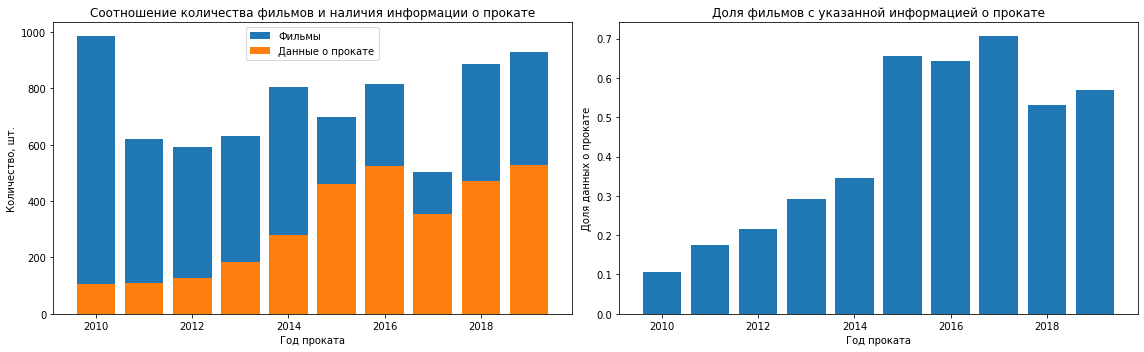

In [72]:
_, ax = plt.subplots(1, 2, figsize=(16, 5))

ax[0].bar(x=movies_per_years.index, height=movies_per_years.title, label='Фильмы')
ax[0].set_xlabel('Год проката')
ax[0].set_ylabel('Количество, шт.')
ax[0].bar(x=movies_per_years.index, height=(movies_per_years.title*movies_per_years.box_is_known), label='Данные о прокате')
ax[0].legend()
ax[0].set_title('Соотношение количества фильмов и наличия информации о прокате')

ax[1].bar(x=movies_per_years.index, height=movies_per_years.box_is_known)
ax[1].set_xlabel('Год проката')
ax[1].set_ylabel('Доля данных о прокате')
ax[1].set_title('Доля фильмов с указанной информацией о прокате')

plt.tight_layout()
plt.show()

В 2010 году в прокат вышло наибольшее количество фильмов, однако информация о кассовых сборах за этот период представлена минимально. В 2017 году вышло наименьшее количество фильмов, но данные о прокате собраны наиболее полно, хотя в абсолютном отношении этот показатель имеет наименьшую величину за период с 2015 по 2019 год. 
В целом же наблюдается положительная тенденция как по количеству фильмов, так и по полноте данных о кассовых сборах.


### Анализ динамики изменения кассовых сборов.

С 2010 по 2014 год включительно доля фильмов с указанной информацией о кассовых сборах составляет менее 50 процентов, поэтому включать эти данные в анализ объемов кассовых сборов нецелесообразно.

In [73]:
df_half = df.drop(df.loc[df['year'] < 2015].index)

In [74]:
box_per_years =(
    df_half.pivot_table(index='year',
                        values='box_office',
                        aggfunc=['sum', 'mean', 'median'])
)

box_per_years.columns = ['sum_box_office', 'mean_box_office', 'median_box_office']
box_per_years

,sum_box_office,mean_box_office,median_box_office
year,,,
2015,"38,527,827,968.00","83,938,624.00","4,784,781.50"
2016,"46,742,315,008.00","89,373,456.00","3,776,087.50"
2017,"48,458,145,792.00","136,501,824.00","9,919,415.00"
2018,"49,251,991,552.00","104,568,984.00","8,751,896.00"
2019,"48,278,102,016.00","91,262,952.00","4,601,033.50"


Построим диаграмму отражающую изменение по годам общей суммы, среднего и медианного значений кассовых сборов.

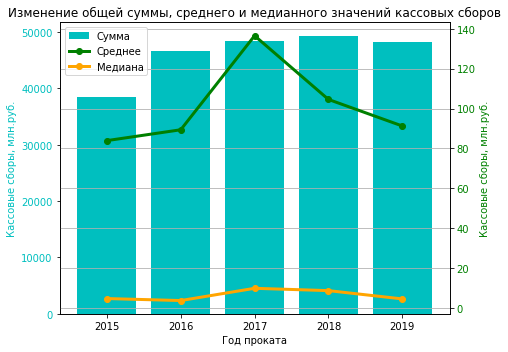

In [75]:
_, ax1 = plt.subplots(figsize=(7,5))
ax2 = ax1.twinx() # создание второй оси ординат, использующей ту же ось абсцисс 

ax1.bar(x=box_per_years.index, height=box_per_years.sum_box_office/1000000, label='Сумма', color='c')
ax1.set_xlabel('Год проката')
ax1.set_ylabel('Кассовые сборы, млн.руб.', color='c')
ax1.tick_params(axis='y', labelcolor='c')

ax2.plot(box_per_years.index, box_per_years.mean_box_office/1000000, label='Среднее', marker = 'o', color='g', linewidth= 3)
ax2.plot(box_per_years.index, box_per_years.median_box_office/1000000, label='Медиана', marker = 'o', color='orange', linewidth= 3)
ax2.set_ylabel('Кассовые сборы, млн.руб.', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# создание единой легенды для обеих осей y
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2

plt.title('Изменение общей суммы, среднего и медианного значений кассовых сборов')
plt.legend(handles, labels, loc= 2)

plt.grid(True)
plt.tight_layout()
plt.show()

Наибольшая сумма кассовых сборов за исследуемый период наблюдалась в 2018 году, в то время как минимальная сумма была зафиксирована в 2015 году. Анализ формы кривых среднего и медианного значений кассовых сборов указывает на то, что общий рост суммы сборов достигался преимущественно благодаря значительному увеличению сборов по небольшому количеству фильмов, а не за счет пропорционального увеличения сборов по всем фильмам, вышедшим в прокат.

### Анализ влияния возрастного ограничения аудитории на кассовые сборы

Исследуем влияние возрастного ограничения на сборы фильмов в прокате в период с 2015 по 2019 год.

In [76]:
box_per_age =(
    df_half.pivot_table(columns='year',
                        index='age_restriction',
                        values='box_office',
                        aggfunc=['sum','count'],
                        margins=True)
)

В полученной сводной таблице переименуем столбцы и изменим их порядок.

In [77]:
box_per_age.columns = [column[0] + '_' + str(column[1]).lower() for column in box_per_age.columns]

In [78]:
box_per_age = box_per_age[['sum_2015', 'count_2015', 'sum_2016', 'count_2016', 'sum_2017', 'count_2017',
                           'sum_2018', 'count_2018', 'sum_2019', 'count_2019', 'sum_all', 'count_all']]

In [79]:
box_per_age

,sum_2015,count_2015,sum_2016,count_2016,sum_2017,count_2017,sum_2018,count_2018,sum_2019,count_2019,sum_all,count_all
age_restriction,,,,,,,,,,,,
«0+»,"379,054,560.00",39,"150,228,848.00",41,"229,598,944.00",3,"32,449,002.00",5,"17,746,066.00",3,"809,077,440.00",91
«6+»,"8,517,311,488.00",52,"12,053,145,600.00",70,"12,031,034,368.00",44,"9,913,758,720.00",65,"12,704,942,080.00",80,"55,220,191,232.00",311
«12+»,"13,419,509,760.00",72,"11,150,761,984.00",80,"7,851,427,840.00",41,"14,267,291,648.00",67,"12,680,199,168.00",85,"59,369,189,376.00",345
«16+»,"10,781,600,768.00",165,"16,594,249,728.00",181,"18,694,590,464.00",120,"16,278,406,144.00",155,"12,753,419,264.00",178,"75,102,265,344.00",799
«18+»,"5,430,350,848.00",131,"6,793,929,728.00",151,"9,651,495,936.00",147,"8,760,085,504.00",179,"10,121,796,608.00",183,"40,757,657,600.00",791
All,"38,527,827,968.00",459,"46,742,315,008.00",523,"48,458,145,792.00",355,"49,251,991,552.00",471,"48,278,102,016.00",529,"231,258,390,528.00",2337


Построим диаграмму, отражающую суммы кассовых сборов фильмов в кинотеатрах в разрезе возрастных ограничений аудитории в период с 2015 по 2019 год.

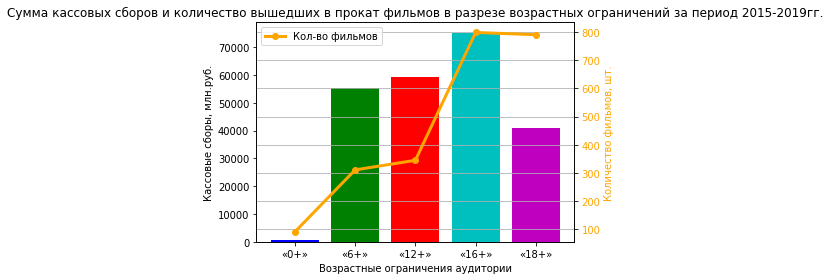

In [80]:
filtered_box_per_age = box_per_age[box_per_age.index != 'All'] # исключение строки All
colors = ['b', 'g', 'r', 'c', 'm'] # цвета для каждого возрастного ограничения

_, ax1 = plt.subplots()
ax2 = ax1.twinx() # создание второй оси ординат, использующей ту же ось абсцисс

ax1.bar(x=filtered_box_per_age.index, height=filtered_box_per_age['sum_all'] / 1000000, color=colors)
ax1.set_xlabel('Возрастные ограничения аудитории')
ax1.set_ylabel('Кассовые сборы, млн.руб.')


ax2.plot(filtered_box_per_age.index, filtered_box_per_age['count_all'], label='Кол-во фильмов', 
         marker = 'o', color='orange', linewidth= 3)
ax2.set_ylabel('Количество фильмов, шт.', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')


plt.title('Сумма кассовых сборов и количество вышедших в прокат фильмов '
          'в разрезе возрастных ограничений за период 2015-2019гг.')
plt.legend(loc=2)
plt.grid(True)
plt.tight_layout()
plt.show()

Фильмы с возрастным ограничением "0+" демонстрируют наименьшие суммы кассовых сборов в исследуемом периоде, и их количество также является минимальным. Наибольшие суммы кассовых сборов дали фильмы с возрастным ограничением "16+". Следует отметить, что, несмотря на примерно одинаковое количество, фильмы с возрастным ограничением "18+" собрали почти в два раза меньше денежных средств по сравнению с фильмами "16+".

Построим диаграммы, отражающие суммы кассовых сборов фильмов, выпущенных с 2015 по 2019 годы, в разрезе возрастных ограничений аудитории, в разбивке по годам.

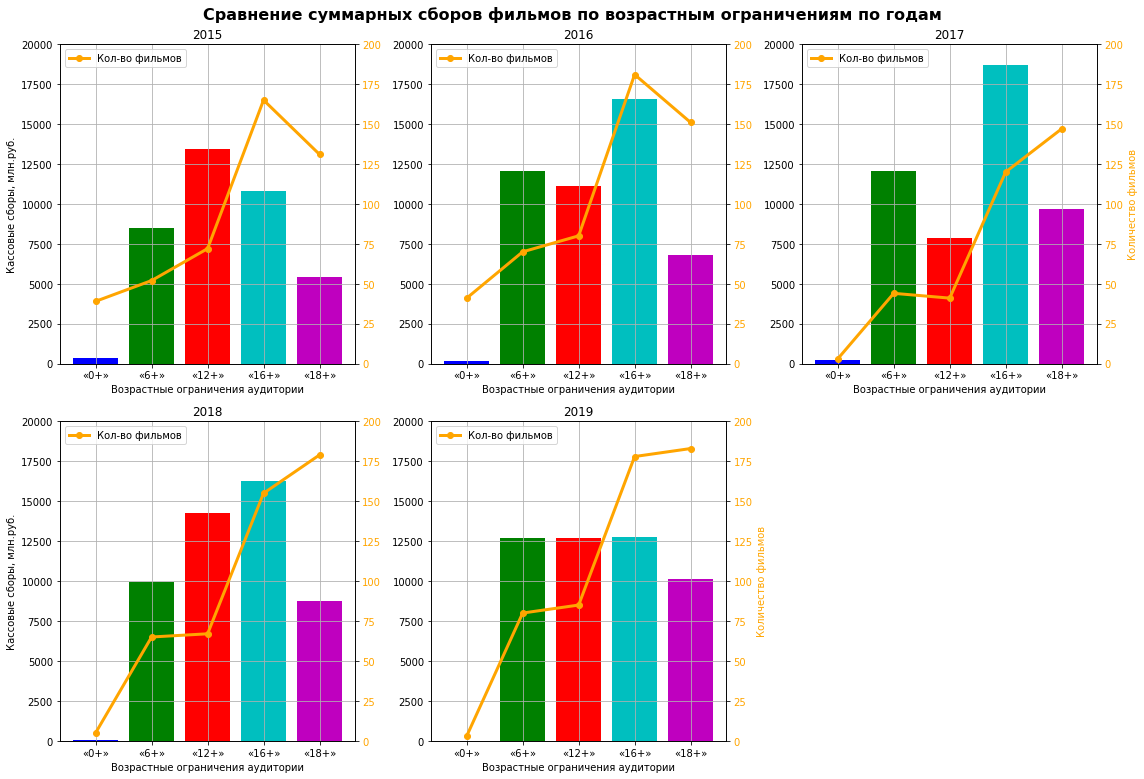

In [81]:
sum_cols = ['sum_2015', 'sum_2016', 'sum_2017', 'sum_2018', 'sum_2019'] # список для столбцов
count_cols = ['count_2015', 'count_2016', 'count_2017', 'count_2018', 'count_2019'] # список для кривой

_, axs = plt.subplots(2, 3, figsize=(16, 11))
axs = axs.ravel() # преобразование двумерного массива в одномерный

for i in range(len(sum_cols)):
    sum_col = sum_cols[i]
    count_col = count_cols[i]
    year = sum_col.split('_')[1]
    ax = axs[i]
    
    ax.bar(filtered_box_per_age.index, filtered_box_per_age[sum_col] / 1000000, color=colors)
    ax.grid(True)
    ax.set_title(year)
    ax.set_ylim([0, 20000])
    ax.set_xlabel('Возрастные ограничения аудитории')
        
    ax2 = ax.twinx() # создание второй оси y
    ax2.plot(filtered_box_per_age.index, filtered_box_per_age[count_col], 
             label='Кол-во фильмов', marker = 'o', color='orange', linewidth= 3)
    ax2.set_ylim([0, 200])
    ax2.tick_params(axis='y', labelcolor='orange')  
    ax2.legend(loc=2)
    
    if i==2 or i==4:
        ax2.set_ylabel('Количество фильмов', color='orange')        
    
axs[5].set_visible(False)
axs[0].set_ylabel('Кассовые сборы, млн.руб.')
axs[3].set_ylabel('Кассовые сборы, млн.руб.')

plt.suptitle('Сравнение суммарных сборов фильмов по возрастным ограничениям по годам', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Как видно из диаграмм, общие кассовые сборы фильмов «0+» и их количество были наименьшими по сравнению с другими категориями в каждый год из исследуемого периода.  Категория «16+» в 2015 году уступала по сборам только категории «12+», а в дальнейшем демонстрировала наибольшие сборы. В 2018 году количество фильмов «16+» было минимальным за исследуемый период, при этом величина сборов - максимальная. К сожалению, в дальнейшем тенденция роста за счет улучшения качества, а не увеличения количества не сохранилась.

В 2019 году суммарные сборы фильмов, относящимся к категориям «6+», «12+» и «16+» были практически одинаковы, хотя количество и фильмов «6+» и фильмов «12+» в два раза меньше, чем фильмов «16+». 

В целом, изменение кассовых сборов фильмов в разрезе возрастных ограничений - это результат взаимодействия различных факторов, таких как тренды в индустрии, маркетинговые стратегии, качество контента и социальные предпочтения аудитории.

Поскольку ранее было установлено, что рост общей суммы кассовых сборов достигался за счет значительного увеличения сборов нескольких фильмов, то для анализа доходности отдельных фильмов в разрезе возрастных категорий следует рассчитать медианное значение, так как оно не чувствительно к выбросам.

In [82]:
box_per_age_md = (
    df_half.pivot_table(index='year',
                        columns='age_restriction',
                        values='box_office',
                        aggfunc='median')
)

In [83]:
box_per_age_md.index = box_per_age_md.index.astype(str)

In [84]:
box_per_age_md

age_restriction,«0+»,«6+»,«12+»,«16+»,«18+»
year,,,,,
2015,"2,943,318.75","19,513,254.00","15,144,119.00","4,321,194.50","4,654,761.50"
2016,"2,571,294.00","3,026,256.00","4,225,478.00","5,085,193.00","6,107,001.50"
2017,"22,178,956.00","50,274,984.00","9,010,548.00","9,641,408.00","8,212,677.00"
2018,"3,616,937.25","14,458,669.00","8,931,966.00","8,751,896.00","7,179,466.00"
2019,"3,885,434.50","12,525,532.00","3,405,545.75","3,210,717.75","5,603,216.50"


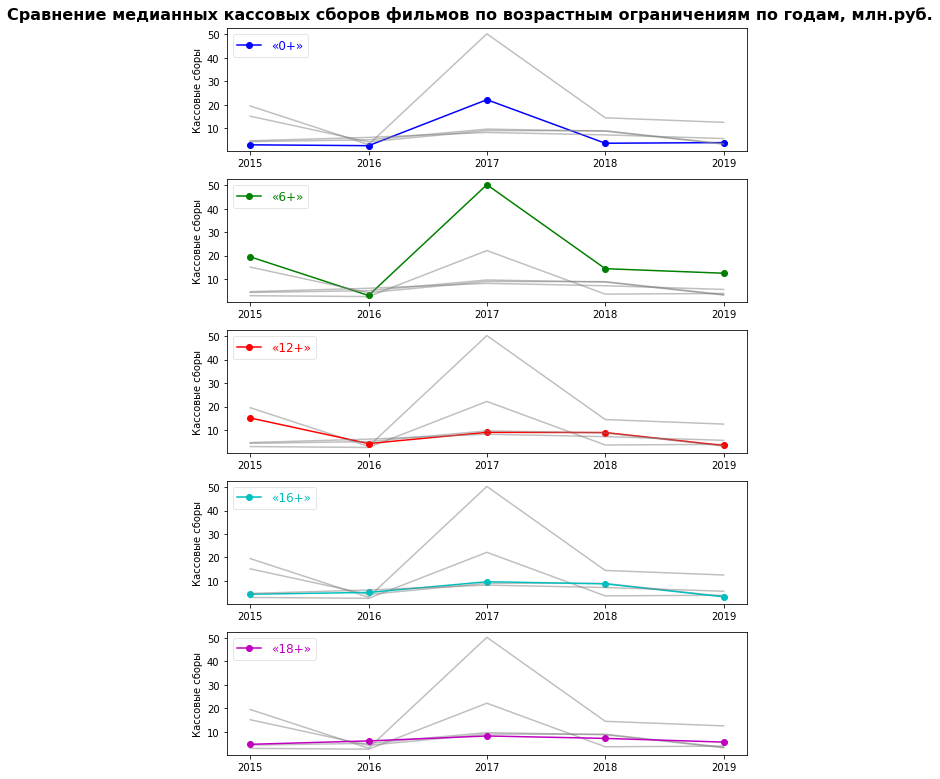

In [85]:
cols = box_per_age_md.columns

# Размеры графика
plt.figure(figsize=(8, 11))

# Построение графиков
for i, col in enumerate(cols):
    plt.subplot(len(cols), 1, i + 1)  # Размещение графиков по вертикали
    for j, other_col in enumerate(cols):
        if col == other_col:
            plt.plot(box_per_age_md.index, box_per_age_md[other_col] / 1e6, 
                     label=other_col, color=colors[j], marker='o')
        else:
            plt.plot(box_per_age_md.index, box_per_age_md[other_col] / 1e6, color='gray', alpha=0.5)

    # Подписи оси Y
    plt.ylabel('Кассовые сборы')


    # Корректируем цвет и маркер в легенде
    legend_handle = plt.Line2D([0], [0], color=colors[i], marker='o', linestyle='-', label=col)
    plt.legend(handles=[legend_handle], loc='upper left', facecolor='white', edgecolor='black', 
               labelcolor=colors[i], framealpha=.1, fontsize=12)

# Общая настройка для выравнивания
plt.suptitle('Сравнение медианных кассовых сборов фильмов по возрастным ограничениям по годам, млн.руб.', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

За исследуемый период, за исключением 2016 года, наиболее прибыльными являлись фильмы для детей от 6 лет. Это может быть связано с тем, что дети указанного возраста не могут прийти в кинотеатр без сопровождения хотя бы одного взрослого, что автоматически увеличивает кассовые сборы.

**Выводы:**

В период с 2010 по 2019 год наблюдается тенденция увеличения как количества вышедших в прокат фильмов, так и полноты данных о кассовых сборах. Тем не менее, данных о прокате фильмов в кинотеатрах за 2010–2014 год (включительно) недостаточно для проведения анализа кассовых сборов.

В период с 2015 по 2019 год суммы кассовых сборов увеличиваются, за исключением небольшого снижения в 2019 году. Рост общей суммы сборов обусловлен преимущественно несколькими фильмами, собравшими значительные суммы, а не равномерным увеличением сборов по всем фильмам, вышедшим в прокат.

Фильмы с возрастным ограничением "0+" демонстрируют наименьшие общие суммы кассовых сборов и их количество также минимально.

Наибольшие общие сборы наблюдаются у фильмов с возрастным ограничением "16+".

Фильмы с возрастным ограничением "18+" за исследуемый период собрали в два раза меньше денежных средств по сравнению с фильмами "16+", хотя их количество примерно одинаковое.

Фильмы с возрастным ограничением "6+" демонстрируют наибольшие относительнные кассовые сборы.  Возможное объяснение этому явлению заключается в том, что дети не могут посещать кинотеатр без сопровождения взрослого, что приводит к автоматическому увеличению кассовых сборов.

## Анализ данных о фильмам, получивших государственную поддержку

### Исследование зависимости объемов гос.финансирования от основных характеристик фильмов.

Для проведения анализа отсеим данные о фильмах, не получивших государственного финансирования.

In [86]:
df_gos = df.loc[df['budget'].notna()]
df_gos.head()

,title,year,type,film_studio,production_country,main_director,producer,age_restriction,refundable_support,nonrefundable_support,budget,budget_part,financing_source,ratings,main_genre,box_office,box_is_known,pu_number,show_start_date,director,genres
1281,Пока еще жива,2013,Художественный,АНО содействия развитию кинематографии Ангел-Ф...,Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+»,0.00,"26,500,000.00","79,411,904.00",0.33,Министерство культуры,8.10,драма,"365,353.59",True,111005313,2013-10-11 12:00:00,А.Атанесян,"драма,мелодрама"
1448,Бесславные придурки,2014,Художественный,ООО Компания АТК-Студио,Россия,А.Якимчук,А.Тютрюмов,«12+»,0.00,"26,000,000.00","37,142,856.00",0.70,Министерство культуры,NaN,Unknown,"28,140.00",True,111003314,2014-03-28 12:00:00,А.Якимчук,Unknown
1498,Невидимки,2013,Художественный,ООО Компания РЕАЛ-ДАКОТА,Россия,Р.Давлетьяров,"Р.Давлетьяров, А.Котелевский, А.Олейников",«12+»,0.00,"107,847,944.00","176,023,488.00",0.61,Фонд кино,5.30,комедия,"19,957,032.00",True,111004213,2013-09-10 12:00:00,"Р.Давлетьяров, С.Комаров","комедия,фантастика"
1524,БЕРЦЫ,2014,Художественный,ООО Студия Пассажир,Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+»,0.00,"28,000,000.00","40,574,140.00",0.69,Министерство культуры,4.20,драма,"55,917.50",True,111004314,2014-05-05 12:00:00,Е.Миндадзе (псевдоним Катя Шагалова),драма
1792,Братья Ч,2014,Художественный,ООО Студия Пассажир,Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+»,0.00,"25,000,000.00","40,015,120.00",0.62,Министерство культуры,6.40,драма,"232,100.00",True,111004414,2014-04-23 12:00:00,М.Угаров,драма


Объявим 2 функции: первая будет преобразовывать датафрейм в сводную таблицу, а вторая строить диаграммы.

In [87]:
def budget_part_pivot(data, index):
    pivot = data.pivot_table(index= index,
                             values=['refundable_support', 'nonrefundable_support', 'budget'],
                             aggfunc='sum')
    pivot =(
        pivot
        .assign(budget_support = (pivot.refundable_support + pivot.nonrefundable_support)) # общий объём средств гос.поддержки
        .assign(budget_part = (pivot.refundable_support + pivot.nonrefundable_support)/pivot.budget) # доля гос.финансирования
        .assign(nonref_support_part = pivot.nonrefundable_support/pivot.budget) # доля невозвратного гос.финансирования
        .assign(ref_support_part = pivot.refundable_support/pivot.budget) # доля возвратного гос.финансирования
    )
    
    return pivot

In [88]:
def budget_part_visio(data, xlabel, ylim, xrotation=0):
    _, ax = plt.subplots(1, 2, figsize=(16, 5))

    ax[0].bar(x=data.index, height=data.budget/1000000, label='Общий бюджет')
    ax[0].bar(x=data.index, height=data.budget_support/1000000, label='Гос.финансирование')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel('млн.руб.')
    ax[0].legend()
    ax[0].set_title('Соотношение общего бюджета и величины гос.финансирования')

    ax[1].bar(x=data.index, height=data.budget_part, label='Доля возвратного гос.финансирования', color='orange')
    ax[1].bar(x=data.index, height=data.nonref_support_part, label='Доля невозвратного гос.финансирования', color='g')
    ax[1].set_xlabel(xlabel)
    ax[1].set_ylabel('Доля гос.финансирования')
    ax[1].set_ylim(ylim) # лимитм по оси y нужен, чтобы хватило места для легенды
    ax[1].legend(loc= 2)
    ax[1].set_title('Соотношение возвратного и невозвратного финансирования в общей доле гос.финансирования')

    ax[0].tick_params(axis='x', rotation=xrotation)  # поворот текста на оси x
    ax[1].tick_params(axis='x', rotation=xrotation)  
    
    plt.tight_layout()
    plt.show()

Исследуем данные о гос.финансировании во временном разрезе. 

In [89]:
df_gos_year = budget_part_pivot(data=df_gos, index='year')
df_gos_year

,budget,nonrefundable_support,refundable_support,budget_support,budget_part,nonref_support_part,ref_support_part
year,,,,,,,
2013,"255,435,392.00","134,347,936.00",0.00,"134,347,936.00",0.53,0.53,0.00
2014,"1,279,484,800.00","478,002,304.00","71,000,000.00","549,002,304.00",0.43,0.37,0.06
2015,"7,309,669,376.00","2,680,088,320.00","547,153,088.00","3,227,241,472.00",0.44,0.37,0.07
2016,"7,228,942,848.00","3,074,655,488.00","902,499,968.00","3,977,155,584.00",0.55,0.43,0.12
2017,"6,972,172,800.00","2,424,624,896.00","674,346,880.00","3,098,971,648.00",0.44,0.35,0.10
2018,"6,651,694,592.00","2,505,999,872.00","592,000,000.00","3,097,999,872.00",0.47,0.38,0.09
2019,"12,542,866,432.00","3,856,000,000.00","868,000,000.00","4,723,999,744.00",0.38,0.31,0.07


В представленных на анализ данных информация о гос.поддержке имеется только для фильмов, вышедших в период с 2013 по 2019 год.

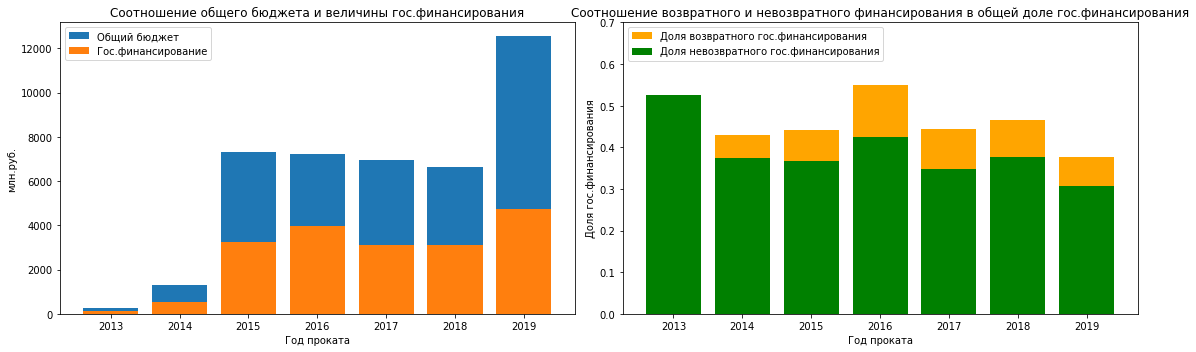

In [90]:
budget_part_visio(data = df_gos_year, xlabel = 'Год проката', ylim = [0, 0.7])

Общая сумма средств, выделяемых государством на поддержку киноиндустрии меняется каждый год, она не зависит от общего бюджета фильмов выходящих в прокат, а является величиной, фиксированной в абсолютном выражении. Соотношение долей возвратных и невозвратных средств не имееют зависимости от общей доли финансирования.

Исследуем зависимость объемов гос.финансирования от возрастной категории фильмов.

In [91]:
df_gos_age = budget_part_pivot(data=df_gos, index='age_restriction')
df_gos_age

,budget,nonrefundable_support,refundable_support,budget_support,budget_part,nonref_support_part,ref_support_part
age_restriction,,,,,,,
«0+»,"902,984,576.00","228,520,000.00","45,000,000.00","273,520,000.00",0.30,0.25,0.05
«6+»,"12,320,906,240.00","3,608,404,480.00","1,268,999,936.00","4,877,404,160.00",0.40,0.29,0.10
«12+»,"15,251,945,472.00","5,905,894,400.00","1,557,500,032.00","7,463,394,304.00",0.49,0.39,0.10
«16+»,"11,513,591,808.00","4,489,900,032.00","751,153,088.00","5,241,053,184.00",0.46,0.39,0.07
«18+»,"2,250,837,248.00","921,000,000.00","32,346,880.00","953,346,880.00",0.42,0.41,0.01


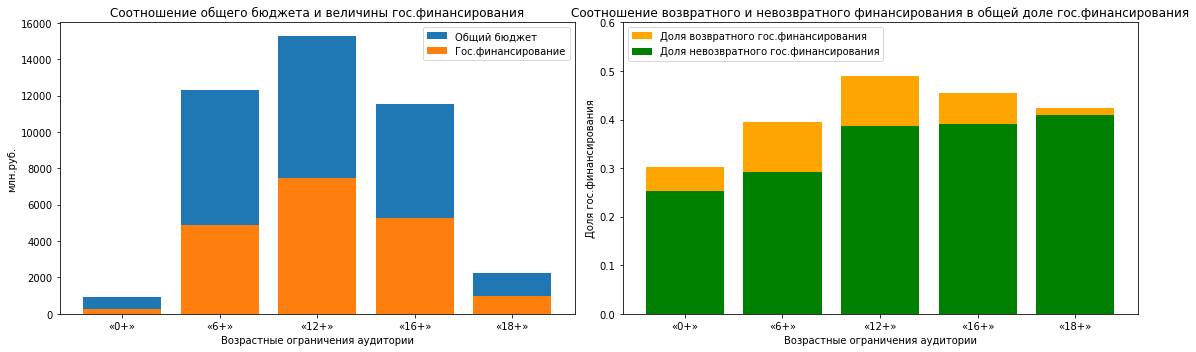

In [92]:
budget_part_visio(data = df_gos_age, xlabel = 'Возрастные ограничения аудитории', ylim = [0, 0.6])

В разрезе возрастных ограничений видно, что наиболее поощряемая государством категория - это фильмы для детей от 12 лет. Их объемы финансирования наибольшие как в абсолютном, так и в относительном выражении. Наименее финансируемая категория - это фильмы "0+", но как было выяснено ранее, таких фильмов выходит очень мало. 

Исследуем зависимость объемов гос.финансирования от типа фильмов.

In [93]:
df_gos_type = budget_part_pivot(data=df_gos, index='type')
df_gos_type

,budget,nonrefundable_support,refundable_support,budget_support,budget_part,nonref_support_part,ref_support_part
type,,,,,,,
Анимационный,"5,240,454,656.00","1,161,520,000.00","740,000,000.00","1,901,520,000.00",0.36,0.22,0.14
Документальный,"33,000,000.00","3,000,000.00",0.00,"3,000,000.00",0.09,0.09,0.00
Музыкально-развлекательный,0.00,0.00,0.00,0.00,NaN,NaN,NaN
Научно-популярный,0.00,0.00,0.00,0.00,NaN,NaN,NaN
Прочие,0.00,0.00,0.00,0.00,NaN,NaN,NaN
Художественный,"36,966,809,600.00","13,989,198,848.00","2,915,000,064.00","16,904,199,168.00",0.46,0.38,0.08


Государство выделяет средства только на поддержку анимационных, художественных и документальных фильмов.

In [94]:
df_gos_type_top = df_gos_type.loc[df_gos_type['budget'] > 0]

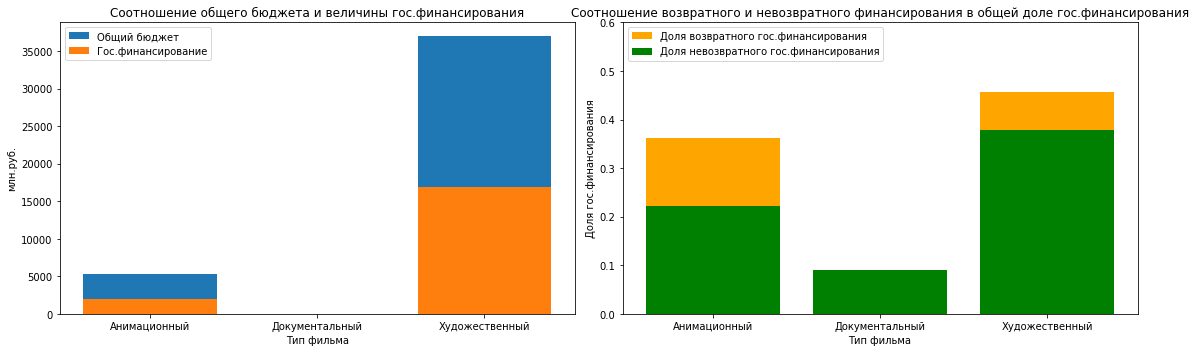

In [95]:
budget_part_visio(data = df_gos_type_top, xlabel = 'Тип фильма', ylim = [0, 0.6])

Наилучшее финансирование имеют художественные фильмы, как в абсолютном, так и в относительном выражении. При этом доля возвратных средств в их бюджете меньше, чем у анимационных фильмов, хотя последние финансируются на 10 процентов хуже. Документальные фильмы финансируются исключительно на невозвратной основе.

Исследуем зависимость объемов гос.финансирования от жанра фильмов.

Выведем на экран 10 жанров с самым большим бюджетом финансирования.

In [96]:
df_gos_genre = budget_part_pivot(data=df_gos, index='main_genre')
df_gos_genre_top = df_gos_genre.loc[df_gos_genre.index != 'Unknown'].sort_values(by='budget_support', ascending=False).head(10)
df_gos_genre_top

,budget,nonrefundable_support,refundable_support,budget_support,budget_part,nonref_support_part,ref_support_part
main_genre,,,,,,,
драма,"11,051,886,592.00","4,611,059,712.00","628,346,880.00","5,239,406,592.00",0.47,0.42,0.06
комедия,"5,915,587,072.00","2,250,782,976.00","732,499,968.00","2,983,282,944.00",0.50,0.38,0.12
мультфильм,"5,285,499,392.00","1,191,520,000.00","740,000,000.00","1,931,520,000.00",0.37,0.23,0.14
фантастика,"2,193,100,800.00","966,000,000.00","190,000,000.00","1,156,000,000.00",0.53,0.44,0.09
фэнтези,"2,340,123,904.00","799,900,032.00","233,000,000.00","1,032,900,032.00",0.44,0.34,0.10
история,"2,145,062,144.00","820,000,000.00","200,000,000.00","1,020,000,000.00",0.48,0.38,0.09
триллер,"1,290,960,896.00","599,645,312.00","110,000,000.00","709,645,312.00",0.55,0.46,0.09
приключения,"3,374,742,016.00","441,000,000.00","255,000,000.00","696,000,000.00",0.21,0.13,0.08
детектив,"1,198,222,336.00","430,000,000.00","55,000,000.00","485,000,000.00",0.40,0.36,0.05


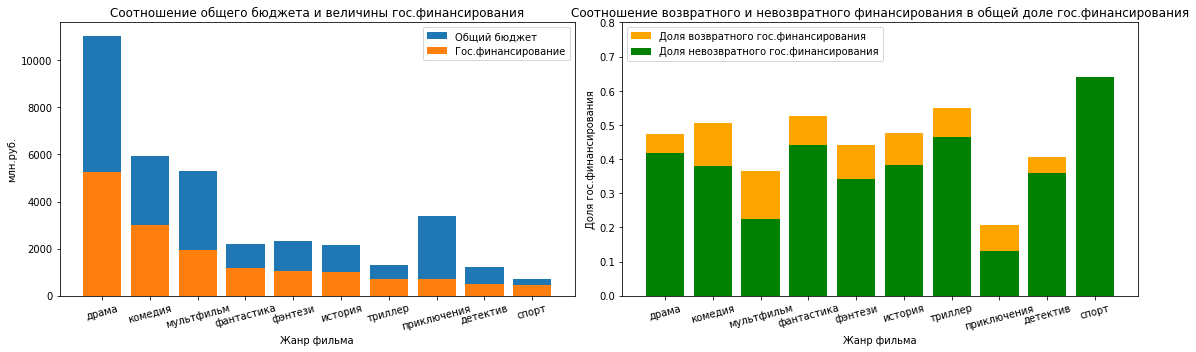

In [97]:
budget_part_visio(data = df_gos_genre_top, xlabel = 'Жанр фильма', ylim = [0, 0.8], xrotation = 15)

Доля гос. поддержки в разрезе жанров не фиксирована. Так, например, наиболее затратным жанром является драма, а доля ее финансирования менее 50 процентов. Наименее затратный жанр - спорт, но его финасирование равно 64 процентам. Менее затратный  по сравнению с приключениями детектив, имеет долю поддержки в раза больше.  Из этого можно сделать вывод, что доля гос.финансирования не зависит от жанра фильма.

### Анализ окупаемости фильмов, получивших гос.поддержку.

С целью проведения анализа окупаемости отсеим фильмы, суммы кассовых сборов которых не указаны. Добавим так же столбец синформацией об окупаемости, в котором `0` соответствует неокупившимся затратам.

In [98]:
df_gos_box = df_gos.loc[df_gos['box_office'].notna()].copy()
df_gos_box['is_paid'] = (((df_gos.box_office-df_gos.budget)/df_gos.budget*100) > 100).astype(int)

df_gos_box

,title,year,type,film_studio,production_country,main_director,producer,age_restriction,refundable_support,nonrefundable_support,budget,budget_part,financing_source,ratings,main_genre,box_office,box_is_known,pu_number,show_start_date,director,genres,is_paid
1281,Пока еще жива,2013,Художественный,АНО содействия развитию кинематографии Ангел-Ф...,Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+»,0.00,"26,500,000.00","79,411,904.00",0.33,Министерство культуры,8.10,драма,"365,353.59",True,111005313,2013-10-11 12:00:00,А.Атанесян,"драма,мелодрама",0
1448,Бесславные придурки,2014,Художественный,ООО Компания АТК-Студио,Россия,А.Якимчук,А.Тютрюмов,«12+»,0.00,"26,000,000.00","37,142,856.00",0.70,Министерство культуры,NaN,Unknown,"28,140.00",True,111003314,2014-03-28 12:00:00,А.Якимчук,Unknown,0
1498,Невидимки,2013,Художественный,ООО Компания РЕАЛ-ДАКОТА,Россия,Р.Давлетьяров,"Р.Давлетьяров, А.Котелевский, А.Олейников",«12+»,0.00,"107,847,944.00","176,023,488.00",0.61,Фонд кино,5.30,комедия,"19,957,032.00",True,111004213,2013-09-10 12:00:00,"Р.Давлетьяров, С.Комаров","комедия,фантастика",0
1524,БЕРЦЫ,2014,Художественный,ООО Студия Пассажир,Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+»,0.00,"28,000,000.00","40,574,140.00",0.69,Министерство культуры,4.20,драма,"55,917.50",True,111004314,2014-05-05 12:00:00,Е.Миндадзе (псевдоним Катя Шагалова),драма,0
1792,Братья Ч,2014,Художественный,ООО Студия Пассажир,Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+»,0.00,"25,000,000.00","40,015,120.00",0.62,Министерство культуры,6.40,драма,"232,100.00",True,111004414,2014-04-23 12:00:00,М.Угаров,драма,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,Тварь,2019,Художественный,ООО СОК,Россия,О.Городецкая,"П.Зарукин, О.Филипук, Ф.Ламшин, М.Абрамов, Н.Т...",«16+»,"5,000,000.00","35,000,000.00","78,422,208.00",0.51,Фонд кино,5.00,триллер,"18,617,156.00",True,111019419,2019-11-26 12:00:00,О.Городецкая,"триллер,драма",0
7453,Фиксики против кработов,2019,Анимационный,АО Аэроплан,Россия,В.Бедошвили,"Г.Васильев, С.Саркисов, И.Попов",«6+»,"80,000,000.00","40,000,000.00","270,000,000.00",0.44,Фонд кино,7.50,мультфильм,"387,590,528.00",True,114004819,2019-12-21 12:00:00,"В.Бедошвили, О.Ужинов, И.Пшонкин, Д.Цыбулькин","мультфильм,детский,приключения",0
7456,Холоп,2019,Художественный,ООО МЕМ-МЕДИА по заказу АО ВБД Груп,Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+»,"25,000,000.00","35,000,000.00","160,000,000.00",0.38,Фонд кино,6.80,комедия,"3,073,568,768.00",True,111021719,2019-12-19 12:00:00,К.Шипенко,комедия,1
7464,Союз спасения,2019,Художественный,ЗАО Дирекция кино,Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+»,"100,000,000.00","400,000,000.00","980,000,000.00",0.51,Фонд кино,6.00,история,"717,703,168.00",True,111022019,2019-12-26 12:00:00,А.Кравчук,"история,биография,драма",0


In [99]:
df_gos_box.is_paid.mean()

0.10631229235880399

Согласно имеющимся данным, только 11% фильмов, получивших гос.поддержу, окупили затраты на съемки. Исследуем этот показатель по годам.

In [100]:
df_gos_box_year = df_gos_box.pivot_table(index='year',
                                         values=['is_paid', 'budget'],
                                         aggfunc={'is_paid': 'mean', 'budget': 'median'})
df_gos_box_year

,budget,is_paid
year,,
2013,"127,717,696.00",0.00
2014,"70,876,176.00",0.07
2015,"56,909,520.00",0.08
2016,"69,883,048.00",0.07
2017,"83,553,408.00",0.14
2018,"94,032,768.00",0.17
2019,"80,000,000.00",0.12


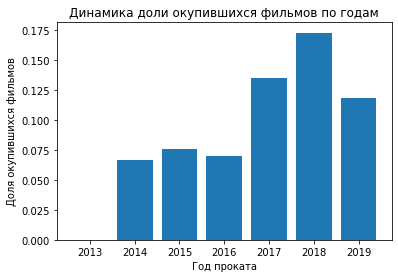

In [101]:
plt.bar(x=df_gos_box_year.index, height=df_gos_box_year.is_paid)
plt.xlabel('Год проката')
plt.ylabel('Доля окупившихся фильмов')
plt.title('Динамика доли окупившихся фильмов по годам')
plt.show()

В рассматриваемый период доли фильмов, окупивших затраты на съемку, увеличивались, достингув максимума в 2018 году, затем наблюдается спад. Следует отметить, в 2013 году не окупилось ни одного фильма.

Исследуем показатель окупаемости по типам фильмов.

In [102]:
df_gos_box_type = df_gos_box.pivot_table(index='type',
                                          values=['is_paid', 'budget'],
                                          aggfunc={'is_paid': 'mean', 'budget': 'median'})
df_gos_box_type

,budget,is_paid
type,,
Анимационный,"208,105,600.00",0.17
Художественный,"70,086,440.00",0.10


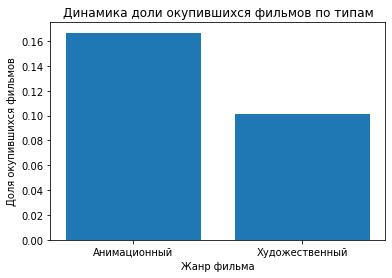

In [103]:
plt.bar(x=df_gos_box_type.index, height=df_gos_box_type.is_paid)
plt.xlabel('Жанр фильма')
plt.ylabel('Доля окупившихся фильмов')
plt.title('Динамика доли окупившихся фильмов по типам')
plt.show()

Несмотря на более высокие затраты, анимационные фильмы окупаются лучше.

Исследуем показатель окупаемости фильмов в разрезе возрастных ограничений.

In [104]:
df_gos_box_age = df_gos_box.pivot_table(index='age_restriction',
                                          values=['is_paid', 'budget'],
                                          aggfunc={'is_paid': 'mean', 'budget': 'median'})
df_gos_box_age

,budget,is_paid
age_restriction,,
«0+»,"90,120,000.00",0.00
«6+»,"139,551,504.00",0.15
«12+»,"86,236,392.00",0.12
«16+»,"57,166,796.00",0.09
«18+»,"51,196,712.00",0.04


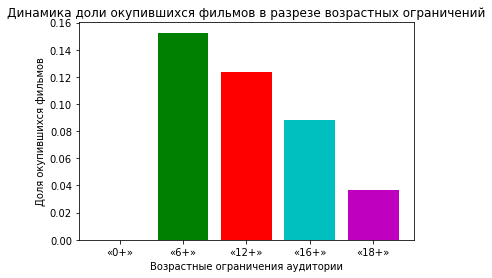

In [105]:
plt.bar(x=df_gos_box_age.index, height=df_gos_box_age.is_paid, color=colors)
plt.xlabel('Возрастные ограничения аудитории')
plt.ylabel('Доля окупившихся фильмов')
plt.title('Динамика доли окупившихся фильмов в разрезе возрастных ограничений')
plt.show()

Больше всего фильмов, окупивших затраты на съемку, в категории "6+", затем следуют фильмы "12+". Окупившихся фильмов "0+" за исследуемый период не наблюдается.

### Анализ рейтингов фильмов, получивших гос.поддержку.

Исследуем какие оценки от зрителей на сайте Кинопоиск получают фильмы с гос.финансированием.

In [106]:
df_gos.ratings.describe()

count   300.00
mean      6.04
std       1.16
min       1.00
25%       5.40
50%       6.20
75%       6.70
max       9.40
Name: ratings, dtype: float64

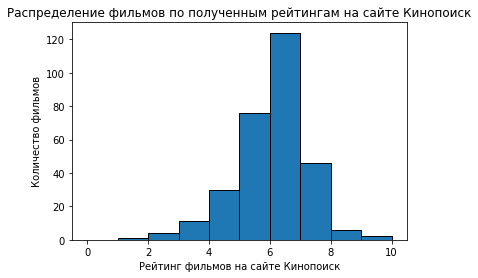

In [107]:
plt.hist(df_gos.ratings, range=(0,10), edgecolor='black')
plt.xlabel('Рейтинг фильмов на сайте Кинопоиск')
plt.ylabel('Количество фильмов')
plt.title('Распределение фильмов по полученным рейтингам на сайте Кинопоиск')
plt.show()

Большинство фильмов получили оценки от 6 до 7 баллов, чуть меньше - от 5 до 6. Минимальная из полученных оценок - 1, а самая высокая - 9,4.

**Выводы:**

Объемы гос.финансирования киноиндустрии пересматриваются каждый год, доля участия государства в затратах на съемки зависит от типа фильма и от его целевой аудитории. Наилучшее финансирование имеют художественные фильмы и фильмы для детей от 12 лет.

Согласно имеющимся данным, только 11% фильмов, получивших государственную поддержку, смогли окупить затраты на съемки. В 2013 году ни один фильм не смог окупиться. Доля окупившихся фильмов достигла максимального значения в 2018 году и составила 17%.

Анимационные фильмы демонстрируют более высокую долю окупаемости по сравнению с художественными фильмами.

Наибольшее количество фильмов, окупивших затраты на съемку, относится к категории "6+", затем следуют фильмы для детей от 12 лет.

Большинство фильмов, финансируемых государством, получили оценки в диапазоне от 6 до 7 баллов, немного меньшее количество фильмов получили оценки от 5 до 6 баллов. Минимальная оценка составляет 1 балл, а наивысшая - 9,4 балла.


## Общий вывод

Представленные на анализ данные состояли из двух таблиц, которые были объединены в единый датафрейм. В исходных данных были исправлены стилистические, орфографические и пунктуационные ошибки. Пропуски были заменены на `Unknown` или оставлены без изменений. Аномалии были частично исправлены, частично удалены.

Данные были исследованы на наличие закономерностей на рынке российского кинопроката в целом, и на рынке кинопроката фильмов, получивших государственную поддержку.

Анализ предоставленных данных позволяет сделать следующие выводы:

С 2010 по 2019 год после значительного спада в начале периода (с 985 до 622) наблюдается увеличение количества выпущенных в прокат фильмов и полноты данных о кассовых сборах. В конце периода количество вышедших фильмов составило 929, а данные о прокате собраны почти для 60% фильмов (против 11% в 2010 году).

В период с 2015 по 2019 год максимальное значение общей суммы кассовых сборов было зафиксировано в 2018 году и составило 49 млрд. руб.  До этого наблюдался плавный рост указанного показателя, но он достигался преимущественно благодаря значительному увеличению сборов по небольшому количеству фильмов, а не за счет пропорционального увеличения сборов по всем фильмам, вышедшим в прокат.

С 2015 по 2019 годы фильмы с возрастным ограничением "0+" демонстрируют наименьшие общие кассовые сборы (809 млн. руб.), их количество также минимально (91). Наибольшие общие сборы наблюдаются у фильмов с возрастным ограничением "16+" (75 млрд. руб.). Фильмы с возрастным ограничением "18+", при сопоставимом количестве, собрали в два раза меньше денежных средств по сравнению с фильмами "16+".

Наибольшие относительные кассовые сборы у фильмов для детей от 6 лет. Это может объясняться тем, что в этом возрасте дети не могут посещать кинотеатр без сопровождения взрослого, что автоматически увеличивает кассовые сборы.

Объемы государственного финансирования киноиндустрии пересматриваются ежегодно, доля участия государства в затратах на съемки зависит от типа фильма и его целевой аудитории. Наилучшее финансирование получают художественные фильмы (46% от общего бюджета всех фильмов этого типа) и фильмы для детей от 12 лет (49% от общего бюджета всех фильмов этой возрастной категории).

Согласно имеющимся данным, за период с 2013 по 2019 год, только 11% фильмов, получивших государственную поддержку, окупили затраты на съемки. В 2013 году ни один фильм не окупился. Доля окупившихся фильмов достигла максимального значения в 2018 году и составила 17%.

Из всех фильмов, получивших гос. финансирование, анимационные фильмы демонстрируют более высокую долю окупаемости по сравнению с художественными фильмами (17% против 10%). Наибольшее количество фильмов, окупивших затраты на съемку, относится к категории "6+"(15%), затем следуют фильмы для детей от 12 лет (12%).

Большинство фильмов, получивших финансирование от государства, имеют оценки в диапазоне от 6 до 7 баллов, немного меньшее количество - от 5 до 6 баллов. Минимальная оценка составляет 1 балл, а наивысшая оценка равна 9,4 балла.
